In [2]:
import pandas as pd
import os
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

root_dir = "/home/jerms/data/maestro-v3.0.0"
csv_name = "maestro-v3.0.0.csv"
_SEED = 2021

def get_training_set():
    csv_dir = os.path.join(root_dir, csv_name)
    
    df = pd.read_csv(csv_dir)
    ds = get_dataset(df)
    
    train_ds = prepare_for_training(ds)

    batch_size = 64
    train_steps = len(df) / batch_size
    
    return train_ds

def get_dataset(csv, ds_dir=root_dir):
    audio_filenames, midi_filenames = [], []
    for row in csv:
        audio, midi = row["audio_filename"], row["midi_filename"]
        audio_filenames.append(audio)
        midi_filenames.append(midi)
    
    audio, midi = tf.constant(audio_filenames), tf.constant(midi_filenames)
    dataset = tf.data.Dataset.from_tensor_slices((audio, midi))    
    return dataset

def load_audio(audio_filepath, midi_filepath):
    audio = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wave(audio, desired_chnnels=1, desired_samples=44100)
    return audio, midi_filepath

def prepare_for_training(ds, shuffle_buffer_size=1024, batch_size=64):
    # Randomly shuffle (file_path, label) dataset
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # Load and decode audio from file paths
    ds = ds.map(load_audio, num_parallel_calls=AUTOTUNE)
    # Repeat dataset forever
    ds = ds.repeat()
    # Prepare batches
    ds = ds.batch(batch_size)
    # Prefetch
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds
        
    

ModuleNotFoundError: No module named 'pandas'

In [3]:
import tensorflow as tf
import tensorflow_io as tfio

In [25]:
audio_filepath = "results/interp_test2.wav"
audio = tf.io.read_file(audio_filepath)
audio, sample_rate = tf.audio.decode_wav(audio, desired_samples=44100)

In [26]:
audio

<tf.Tensor: shape=(44100, 1), dtype=float32, numpy=
array([[-0.00018311],
       [-0.03848267],
       [-0.02896118],
       ...,
       [ 0.01235962],
       [ 0.02194214],
       [-0.01174927]], dtype=float32)>

In [9]:
def mel_spec(audio):
    spectrogram = tfio.audio.spectrogram(
        audio, nfft=512, window=512, stride=256)
    mel_spectrogram = tfio.audio.melscale(
        spectrogram, rate=22050, mels=128, fmin=0, fmax=8000)
    return mel_spectrogram

In [17]:
spec = mel_spec(audio)

In [29]:
paddings = tf.constant([[0, 3], [0,0]])
tf.pad(spec, paddings, "CONSTANT")

<tf.Tensor: shape=(176, 128), dtype=float32, numpy=
array([[0.       , 0.       , 5.575243 , ..., 2.7425394, 2.1051857,
        1.6715722],
       [0.       , 0.       , 3.2529213, ..., 1.0955682, 1.1897069,
        1.569998 ],
       [0.       , 0.       , 7.019473 , ..., 1.0022999, 1.1130923,
        1.0885688],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)>

In [18]:
spec

<tf.Tensor: shape=(173, 128), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 5.5752430e+00, ..., 2.7425394e+00,
        2.1051857e+00, 1.6715722e+00],
       [0.0000000e+00, 0.0000000e+00, 3.2529213e+00, ..., 1.0955682e+00,
        1.1897069e+00, 1.5699980e+00],
       [0.0000000e+00, 0.0000000e+00, 7.0194731e+00, ..., 1.0022999e+00,
        1.1130923e+00, 1.0885688e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.7429550e-01, ..., 1.0997683e+00,
        1.0803130e+00, 1.3906722e+00],
       [0.0000000e+00, 0.0000000e+00, 4.3258923e-01, ..., 6.8472600e-01,
        1.0129907e+00, 6.7078996e-01],
       [0.0000000e+00, 0.0000000e+00, 6.4743878e-03, ..., 4.2271283e-02,
        4.7870308e-02, 3.4734722e-02]], dtype=float32)>

In [12]:
import matplotlib.pyplot as plt

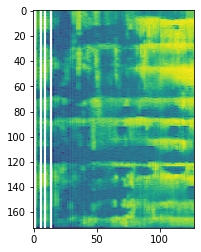

In [19]:
plt.figure()
plt.imshow(tf.math.log(spec).numpy())